In [296]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab
import scipy.io
import numpy as np

### Data Loading

In [297]:
D_emp = scipy.io.loadmat('../Monkey D/behavData_dam.mat')
D_speed_sim = scipy.io.loadmat('../Monkey D/sim_D_speed.mat')
D_acc_sim = scipy.io.loadmat('../Monkey D/sim_D_acc.mat')

E_emp = scipy.io.loadmat('../Monkey E/behavData_eli.mat')
E_speed_sim = scipy.io.loadmat('../Monkey E/sim_E_speed.mat')
E_acc_sim = scipy.io.loadmat('../Monkey E/sim_E_acc.mat')

In [298]:
D_acc_sim_rt = D_acc_sim['simulate_rt']
D_speed_sim_rt = D_speed_sim['simulate_rt']

E_acc_sim_rt = E_acc_sim['simulate_rt']
E_speed_sim_rt = E_speed_sim['simulate_rt']

In [299]:
D_emp_acc_coh = D_emp['task']['data'][0, 1]['coh'][0, 0]
D_emp_acc_rt = D_emp['task']['data'][0, 1]['rt'][0, 0] / 1000

D_emp_speed_coh = D_emp['task']['data'][0, 0]['coh'][0, 0]
D_emp_speed_rt = D_emp['task']['data'][0, 0]['rt'][0, 0] / 1000

E_emp_acc_coh = E_emp['task']['data'][0, 1]['coh'][0, 0]
E_emp_acc_rt = E_emp['task']['data'][0, 1]['rt'][0, 0] / 1000

E_emp_speed_coh = E_emp['task']['data'][0, 0]['coh'][0, 0]
E_emp_speed_rt = E_emp['task']['data'][0, 0]['rt'][0, 0] / 1000

In [466]:
coh_lst = np.sort(np.unique(D_emp_acc_coh))

### Plotting

In [491]:
def plot_dist(sim_acc_rt, sim_speed_rt, emp_acc_rt, emp_speed_rt, emp_acc_coh, emp_speed_coh, monkey):
    coh_num = len(coh_lst)
    fig, axes = plt.subplots(coh_num, 1)
    num_bins = 4
    perc = 70
    #x_max = np.percentile(np.concatenate((emp_acc_rt, emp_speed_rt)), 98)
    x_max = 1.2
    y_max = 0
    
    for i in range(coh_num):
        cur_sim_acc = sim_acc_rt[:, i]
        cur_sim_speed = sim_speed_rt[:, i]
        cur_emp_acc = emp_acc_rt[emp_acc_coh == coh_lst[i]]
        cur_emp_speed = emp_speed_rt[emp_speed_coh == coh_lst[i]]
        cur_acc_rate = len(cur_sim_acc) / len(cur_emp_acc)
        cur_speed_rate = len(cur_sim_speed) / len(cur_emp_speed)
        
        gap = (np.percentile(cur_emp_speed, perc) - np.percentile(cur_emp_speed, 100-perc)) / num_bins
        sim_gap = np.arange(min(np.concatenate((cur_sim_acc, cur_sim_speed))),
                            max(np.concatenate((cur_sim_acc, cur_sim_speed)))+gap, gap)
        emp_gap = np.arange(min(np.concatenate((cur_emp_acc, cur_emp_speed))), 
                            max(np.concatenate((cur_emp_acc, cur_emp_speed)))+gap, gap)
        
        sim_acc_count, _ = np.histogram(cur_sim_acc, bins=sim_gap)
        sim_speed_count, _ = np.histogram(cur_sim_speed, bins=sim_gap)
        sim_bin_center = (sim_gap + gap/2)[:-1]
        
        emp_acc_count, _ = np.histogram(cur_emp_acc, bins=emp_gap)
        emp_speed_count, _ = np.histogram(cur_emp_speed, bins=emp_gap)
        y_max = max(y_max, max(np.concatenate((sim_acc_count/cur_acc_rate, sim_speed_count/cur_speed_rate, 
                                               emp_acc_count, emp_speed_count))))
        
        cur_ax = axes[i]
        sns.histplot(cur_emp_acc, bins=emp_gap, ax=cur_ax, color='#8D8DAA', alpha=.5, label='Accuracy')
        sns.histplot(cur_emp_speed, bins=emp_gap, ax=cur_ax, color='#EA5455', alpha=.5, label='Empirical')
        
        cur_ax.plot(sim_bin_center, sim_acc_count / cur_acc_rate, color='#86A3B8', label='Fitted')
        cur_ax.plot(sim_bin_center, sim_speed_count / cur_speed_rate, color='#BD574E', label='Speed')
        
        cur_ax.set_xlim([.15, x_max])
        cur_ax.spines['left'].set_color('0')
        cur_ax.spines['bottom'].set_color('0')
        cur_ax.tick_params(bottom=True, left=True)
        cur_ax.set_title(f"Coh {coh_lst[i]:.1%}")
        cur_ax.set_ylabel('')
        
        if i != coh_num-1:
            cur_ax.set_xticklabels([])
        else:
            cur_ax.set_xlabel('Reaction Time (s)')
        
    for ax in axes:
        ax.set_ylim([0, y_max]) 
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))
        
    font_size = 15
    params = {
        'figure.figsize': (4, 15),
         'legend.fontsize': font_size,
         'axes.labelsize': font_size,
         'axes.titlesize': font_size,
         'xtick.labelsize': font_size,
         'ytick.labelsize': font_size,
         'axes.facecolor': 'white',
         'patch.linewidth': 0
    }
    pylab.rcParams.update(params)
    fig.tight_layout()

    plt.savefig(f'graphs/{monkey}_dist.tiff', format='tiff', bbox_inches='tight')

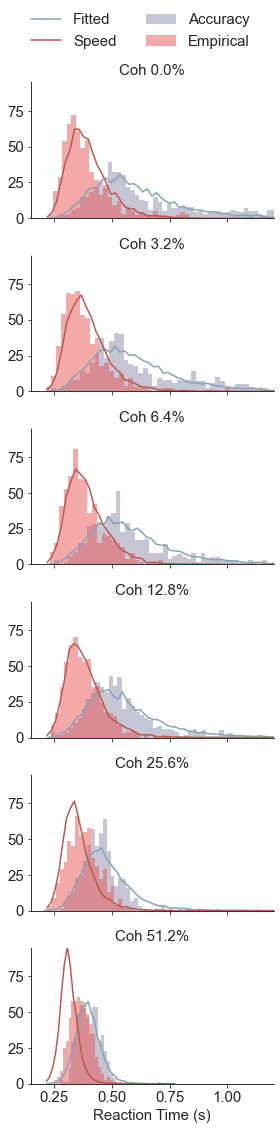

In [492]:
plot_dist(D_acc_sim_rt, D_speed_sim_rt, D_emp_acc_rt, D_emp_speed_rt, D_emp_acc_coh, D_emp_speed_coh, 'D')

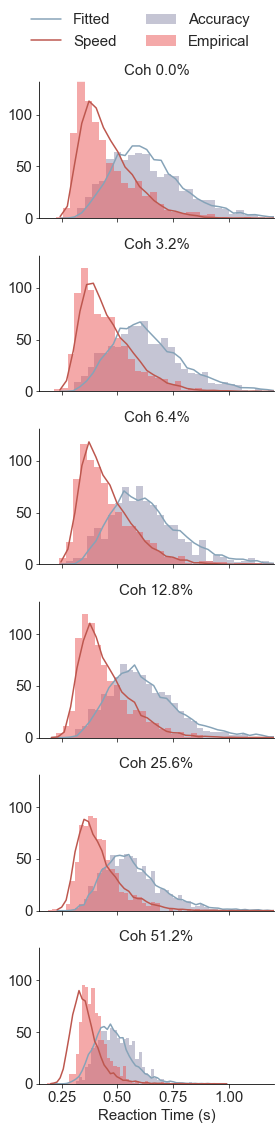

In [493]:
plot_dist(E_acc_sim_rt, E_speed_sim_rt, E_emp_acc_rt, E_emp_speed_rt, E_emp_acc_coh, E_emp_speed_coh, 'E')